In [17]:
%pylab notebook
#lib for widgets
import ipywidgets as widg
#importing our lib for binning and fitting
from gymness import binning
from scipy import stats #need for chi2 statistics
from IPython.display import Latex
import pandas as pd
from gymness import binning

Populating the interactive namespace from numpy and matplotlib


### We calculate the offset of the probes after the change of the probe 2. 

We need a measure without plasma --> We can use the data for capacity calibration. 

In [18]:
#Global variables
df           = None
R            = 502. #circuit resistance 
e_charge     = -1.60217653*10**(-19)

<IPython.core.display.Javascript object>


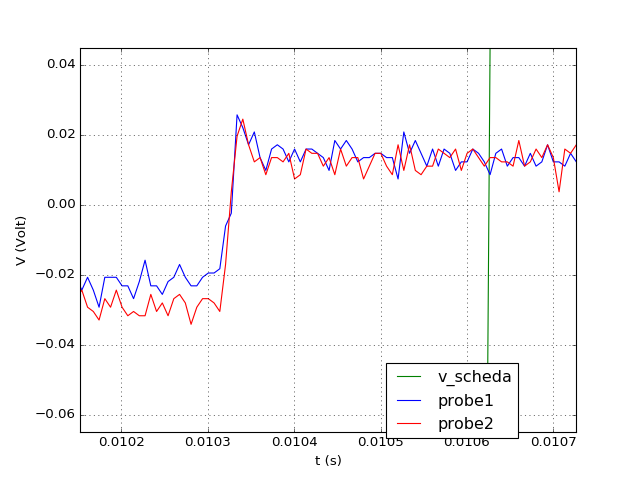

In [30]:
file_path1 = 'data/data_capacity/160422002.txt'
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
df2 = binning.read_data(file_path1, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns

fig, ax = plt.subplots(1,1)
ax.plot(df1.t, df1.v_scheda,'g')
ax.plot(df1.t, -1*df1.v_res,'b', label="probe1")
ax.plot(df2.t, df2.v_res,'r', label="probe2")
ax.legend(bbox_to_anchor=(0.9,0.2))
ax.grid()
ax.set_xlabel("t (s)")
ax.set_ylabel("V (Volt)")

In [34]:
file_path1 = 'data/data_capacity/160422002.txt'
df = pd.read_csv(file_path1, delimiter='\t', usecols=[0,1,2,3], header=None)
df.columns = [ 't', 'x1', 'x2', 'x3' ]
df = df.reset_index(drop=True)
#NOT AMPLIFIED
df['x1'] 
df['x2'] 
x = df['t']
df.head()
print('Loaded dataframe')
print("offset 1 mean: {} +- {}".format(df.x1.mean() , df.x1.std()))
print("offset 2 mean: {} +- {}".format(df.x2.mean(), df.x2.std()))

#FOR GAIN 0.2

Loaded dataframe
offset 1 mean: 0.00406391275097257 +- 0.018582212637906832
offset 2 mean: -0.007995178874620862 +- 0.021420918290227138


In [35]:
file_path1 = 'data/data_capacity/160422002.txt'
df = pd.read_csv(file_path1, delimiter='\t', usecols=[0,1,2,3], header=None)
df.columns = [ 't', 'x1', 'x2', 'x3' ]
df = df.reset_index(drop=True)
# AMPLIFIED
df['x1'] *= 5 
df['x2'] *= 5
x = df['t']
df.head()
print('Loaded dataframe')
print("offset 1 mean: {} +- {}".format(df.x1.mean()/2 , df.x1.std()/2))
print("offset 2 mean: {} +- {}".format(df.x2.mean()/2, df.x2.std()/2))

#FOR GAIN 0.5


Loaded dataframe
offset 1 mean: 0.010159781877431426 +- 0.04645553159476707
offset 2 mean: -0.019987947186552155 +- 0.05355229572556784


<IPython.core.display.Javascript object>


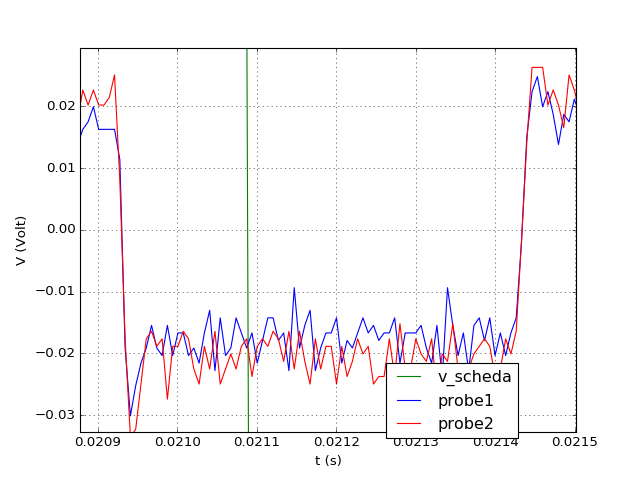

In [32]:
file_path1 = 'data/data_capacity/160422002.txt'
df1 = binning.read_data(file_path1, [0,1,3] , ['t','v_res','v_scheda']) #read the first three columns
df2 = binning.read_data(file_path1, [0,2,3] , ['t','v_res','v_scheda']) #read the first three columns

df1.v_res -= 0.00406391275097257
df2.v_res -= -0.007995178874620862

fig, ax = plt.subplots(1,1)
ax.plot(df1.t, df1.v_scheda,'g')
ax.plot(df1.t, -1*df1.v_res,'b', label="probe1")
ax.plot(df2.t, df2.v_res,'r', label="probe2")
ax.legend(bbox_to_anchor=(0.9,0.2))
ax.grid()
ax.set_xlabel("t (s)")
ax.set_ylabel("V (Volt)")